# PHAS0031:Computational Physics: Week 6: Assessment
## Joshua Giblin-Burnham(SN.:19052055)

## Introduction:

In this notebook will examine wave equations and the variation value of $r$ (which is equivalent to changing the refractive index of an optical material). 

The relevant equation is:
$$\frac{\partial^2\theta}{\partial t^2}=c(x)^2\frac{\partial^2\theta}{\partial x^2}$$
where $c(x)=c/n(x)$ and $n(x)$ is a refractive index that varies with position (e.g. air - glass - air, as found in most windows).

In [1]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Section 1:
### Setting up the wave equation update

We wile uses the wave equation update scheme, derivied from the centred differences, we discretise time and space using steps $\mathrm{\Delta t}$ and $\mathrm{\Delta x}$.( Note: $(x_i,t_n)=(i\mathrm{\Delta x},n\mathrm{\Delta t}) $ and so $\theta(x_i,t_n)=\theta_{i,n}$)

The resulting finite difference formulae give us:

$$\begin{matrix}\frac{\theta_{i,n+1}-2\theta_{i,n}+\theta_{i,n-1}}{\mathrm{\Delta}t^2}&=&c(x_i)^2\frac{\theta_{i+1,n}-2\theta_{i,n}+\theta_{i-1,n}}{\mathrm{\Delta}x^2}\\r_i&=&c(x_i)\mathrm{\Delta t}/\mathrm{\Delta x}\\\theta_{i,n+1}&=&2\theta_{i,n}-\theta_{i,n-1}+r_i^2\left[\theta_{i+1,n}-2\theta_{i,n}+\theta_{i-1,n}\right]\\&&\\\theta_{i,n+1}&=&2(1-r_i^2)\theta_{i,n}-\theta_{i,n-1}+r_i^2\left[\theta_{i+1,n}+\theta_{i-1,n}\right]\\\end{matrix}$$

The parameter r here will be varied and input as an array of r values for corresponding x position. This will not produce any change to the implimentation of the update scheme with a constant due to array multiplication in python. Arrays in python multiple akin to a dot product thus if we input an array the same shape as the theta array it will multiply the corresponding array index together, as show below:

`a= [a_1, a_2,..., a_i]
b= [b_1, b_2,..., b_i]
a*b= [a_1*b_1, a_2*b_2,..., a_i*b_i]`



In [2]:
def explicit_wave_eq_update(theta_n, theta_nm1, r):
    '''  Updates wave equation solver scheme
    Inputs: 
    
    theta_n    Wave at time t_n     = n*dt
    theta_nm1  Wave at time t_{n-1} = (n-1)*dt
    r          Constant array (c(x_i)^2 dt/dx)
    
    Output:
    theta at time t_{n+1} = (n+1)*dt '''
    
    theta_np1 = 2*(1-r**2)*theta_n - theta_nm1 + ( np.roll(theta_n, -1) + np.roll(theta_n,1) )*r**2
    
    return theta_np1

### Set up the wave, arrays and initial conditions

In [3]:
# Setting up wave variables 
l = 1   # m
f = 1   # hz
c = f*l # m/s

k = 2*np.pi/l
w = 2*np.pi*f

# Define number of points, no. of wavelengths and factor r
Nx = 50
mult = 5 
r = 0.3*np.ones(mult*Nx)

# Start and end points for change of r
st = int( 2*Nx/l )
en = int( 3*Nx/l )
r[st:en+1] = 0.15

# Initialise variables, dt is calculated using main medium r value
dx = l /Nx
dt = r[0]*dx/c
x  = np.arange(0, mult*l, dx)

### Run the solver, storing the results, and plot

In [4]:
# Setup theta space array
t = 0
theta_0 = np.sin( k*x - w*t )
t += dt
theta_1 = np.sin( k*x - w*t )

# Restrict initial wave to one wavelength
theta_0[int( 1*Nx/l )+1:] = 0.0
theta_1[int( 1*Nx/l )+1:] = 0.0

# Run for 1000 steps
Nt = 1000
store_theta = [theta_0, theta_1]

# Iterations over steps
for n in range(2,Nt):
    t += dt
    
    # Impliments differential update
    theta_n = explicit_wave_eq_update(theta_1,theta_0,r)
    theta_0 = theta_1
    theta_1 = theta_n
    
    # (Boundary condition below, can be used to keep wave at zero at start/end)
    # theta_1[0]=0
    # theta_1[-1]=0
    
    # Stores wave over time
    store_theta.append(theta_n)

store_theta= np.array(store_theta)

# Create x, t grid
t0 = np.linspace(0,t,Nt)
x2d, t2d = np.meshgrid(x,t0)

### 3D plot and contour

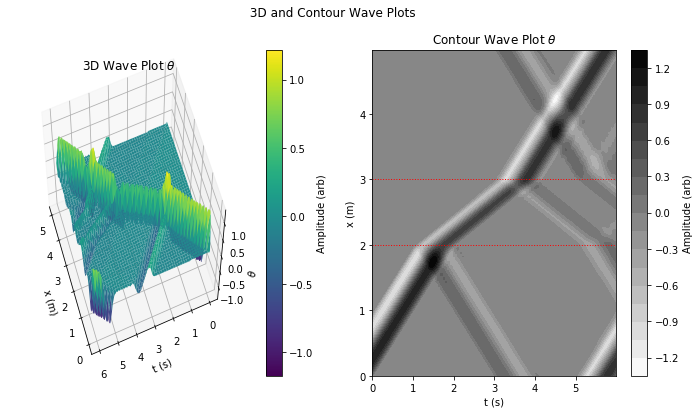

In [5]:
# 3D and Contour plots
fig1 = plt.figure(figsize=(12,6))
fig1.suptitle(' 3D and Contour Wave Plots')

# 3D subplot
plot1 = fig1.add_subplot(1, 2, 1, projection='3d')
surf = plot1.plot_surface(x2d, t2d, store_theta, cmap='viridis')

# Set axis and title
plot1.set_xlabel('x (m)')
plot1.set_ylabel('t (s)')
plot1.set_zlabel(r'$\theta$')
plot1.set_title('3D Wave Plot 'r'$\theta$')
plot1.view_init(60, 160)

# Colour Bar
cbar1 = fig1.colorbar(surf, ax= plot1)
cbar1.set_label('Amplitude (arb)')

# Contour subplot
plot2 = fig1.add_subplot(1, 2, 2)
contr = plot2.contourf(t2d, x2d, store_theta,25, cmap='binary')

# Set axis and title
plot2.axhline(2,color='r',ls=':', lw='1')
plot2.axhline(3,color='r',ls=':', lw='1')
plot2.set_xlabel('t (s)')
plot2.set_ylabel('x (m)')
plot2.set_title('Contour Wave Plot 'r'$\theta$')

# Colour Bar
cbar2 = fig1.colorbar(contr, ax= plot2)
cbar2.set_label('Amplitude (arb)')

plt.show()

#### Comment:
We observe when solving the wave equation altering the refractive index produces refraction. We see a few phenomena:

1) We clearly see refraction as the wave direction changes/ is bent at the boundary of the medium

2) We also see partial reflection at the boundarys of the 'mediums'

3) On the 3D plots we see as the waves positive amplitude increase on the boundary of the medium, as the forward and reflected waves interfere and superimpose.

4) The amplitude also drops in the medium, this is as part of the waves energy is lost in the partial reflection, as wel as, the medium itself takes some of the wave energy- in the physical world this occurs as the oscilations of the light wave induces oscilations in the electrons in atoms, producing waves themself which interfer and superimpose with the light itsels.

5) We see some other faint waves, these are a result of our implimentation, as we use np.roll when the wave passes the x boundary it re-enters at the bottom x boundary, this is `np.roll` gives a period boundary condition/ this acts as and infinite loop. In the code I have commented out boundary conditions to set the boundaries to zero- this makes the boundaries act as perfect mirrors

### 2D subplots

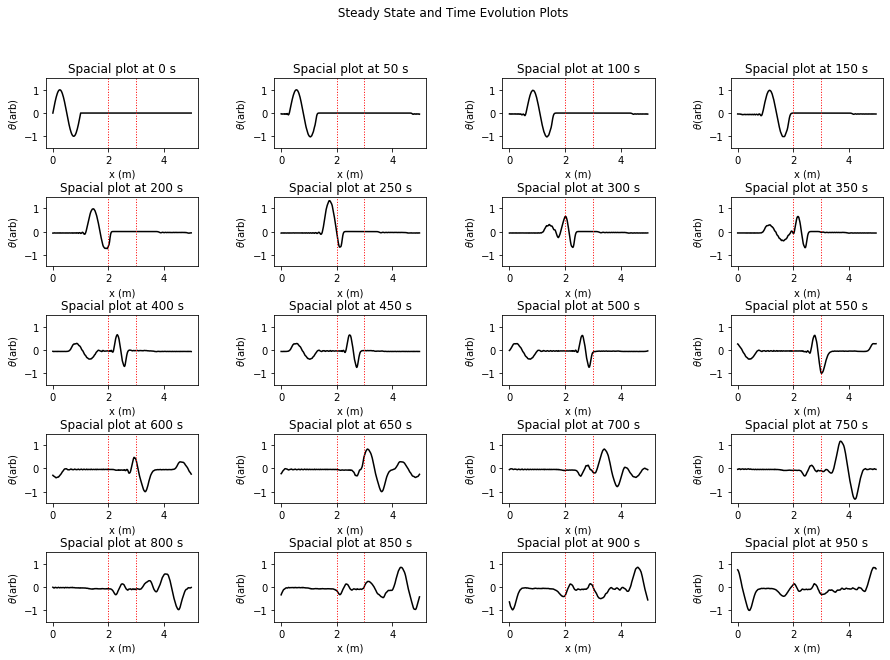

In [6]:
# Snapshot of plot over time
fig_parts = plt.figure(figsize=(15,10))
fig_parts.suptitle(' Steady State and Time Evolution Plots')

# Layout of subplot setup
rows = 5
cols = 4
num  = rows*cols
step = int(Nt/num)

# Plots subplots
for i in range(0,num):
    # Adds subplot of the theta value at time i
    ax = fig_parts.add_subplot(rows, cols, i+1)
    ax.plot(x, store_theta[i*step],'k')
    ax.axvline(2,color='r',ls=':', lw='1')
    ax.axvline(3,color='r',ls=':', lw='1')
    
    # Sets axis and labels
    ax.set_ylim((-1.5,1.5))
    ax.set_xlabel('x (m)')
    ax.set_ylabel(r'$\theta $(arb)')
    ax.set_title('Spacial plot at ' + str(i*step)+' s')
    
    # Adjust layout
    plt.subplots_adjust(hspace = 0.7, wspace = 0.5)

### Animated 2D plots

In [7]:
#Animation imports
import time
from IPython.display import clear_output

In [ ]:
for i in range(0,len(store_theta)):
    if i%5==0:
        print(i)

        # Clears plot
        clear_output(wait=True)

        # Plots theta array
        animated, axa = plt.subplots(1)
        axa.plot(x, store_theta[i],'k')
        axa.axvline(2,color='r',ls=':', lw='1')
        axa.axvline(3,color='r',ls=':', lw='1')

        # Set axis and labels
        axa.set_xlabel('x (m)')
        axa.set_ylabel(r'$\theta $(arb)')
        axa.set_ylim((-1.5,1.5))
        axa.set_title('Animated wave plot')

        # Draws plot
        plt.draw()
        plt.pause(0.001)

#### Comment:
We see that the 3D plot shows much more intuitively the refraction and bending of the wave through time, however, the subplot/ animated plot are advantageous in showing the time evolution of the wave form and interferance of the wave with itself. The subplots clearly show the seperation of the wave at the interface of the medium. Both plots have advantages depending on the physics being examined

## Section 2:

### Varying refractive index
Now we do the same simulation, but this time make the refractive index vary between $2\lambda<x<3\lambda$. We used $0.1\left(cos(2\pi(x-2\lambda)/\lambda)+2\right)$ to get a smoothly varying function from r=0.3 to r=0.1 and back again

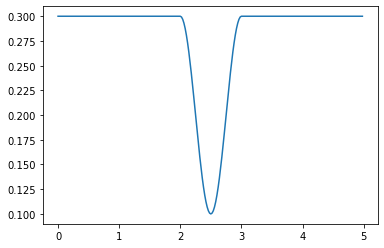

In [8]:
# Initialise new x and theta arrays

xv = np.arange(0, mult*l, dx)

tv = 0
theta_0v = np.sin( k*xv - w*tv )

tv += dt
theta_1v = np.sin( k*xv - w*tv )

# Restrict initial wave to one wavelength
theta_0v[int( 1*Nx/l )+1:] = 0.0
theta_1v[int( 1*Nx/l )+1:] = 0.0


# Set up r function
st = int( 2*Nx/l )
en = int( 3*Nx/l )
rv = 0.3*np.ones(mult*Nx)
rv[st:en+1] = 0.1*( np.cos(2*np.pi*(xv[st:en+1]-2*l)/l)+2)

# Plot r to see its variation
plt.plot(xv,rv)

# Run for 1000 steps
Nn = 1000
store_thetav = [theta_0v, theta_1v]

# Iterations over steps
for n in range(2,Nn):
    tv += dt
    
    # Impliments differential update
    theta_nv = explicit_wave_eq_update(theta_1v, theta_0v, rv)
    theta_0v = theta_1v
    theta_1v = theta_nv
    
    # (Boundary condition below, can be used to keep wave at zero at start/end)
    #theta_1v[0]=0
    #theta_1v[-1]=0
    
    # Stores theta arrays
    store_thetav.append(theta_nv)

store_thetav= np.array(store_thetav)

# Create x, t grid
tv0 = np.linspace(0,tv,Nn)
x2dv, t2dv = np.meshgrid(xv,tv0)

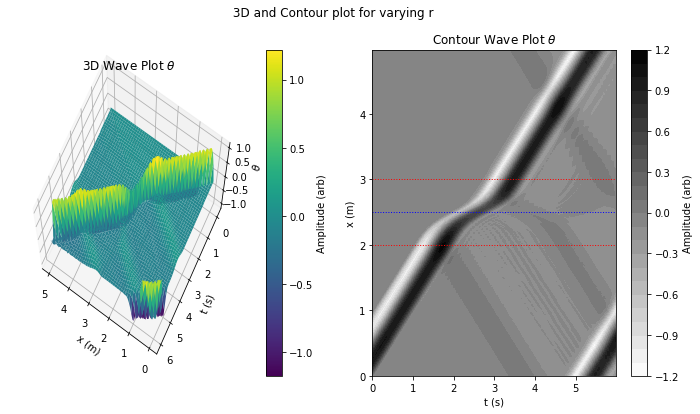

In [9]:
# 3D and Contour Plot
fig2 = plt.figure(figsize=(12,6))
fig2.suptitle(' 3D and Contour plot for varying r')

# 3D subplot
plot3 = fig2.add_subplot(1, 2, 1, projection='3d')
surf2 = plot3.plot_surface(x2dv, t2dv, store_thetav, cmap='viridis')

# Set axis and title
plot3.set_xlabel('x (m)')
plot3.set_ylabel('t (s)')
plot3.set_zlabel(r'$\theta$')
plot3.set_title('3D Wave Plot 'r'$\theta$')
plot3.view_init(70, 120)

# Colour Bar
cbar3 = fig2.colorbar(surf, ax= plot3)
cbar3.set_label('Amplitude (arb)')

# Contour subplot
plot4 = fig2.add_subplot(1, 2, 2)
contr = plot4.contourf(t2dv, x2dv, store_thetav, 25, cmap='binary')
plot4.axhline(2,color='r',ls=':', lw='1')
plot4.axhline(2.5,color='b',ls=':', lw='1')
plot4.axhline(3,color='r',ls=':', lw='1')

# Set axis and title
plot4.set_xlabel('t (s)')
plot4.set_ylabel('x (m)')
plot4.set_title('Contour Wave Plot 'r'$\theta$')

# Colour Bar
cbar4 = fig1.colorbar(contr, ax= plot4)
cbar4.set_label('Amplitude (arb)')

plt.show()

#### Comment:
Chosen the 3D plot as better show the refraction phenomena. We see the wave gradually bends, rather than straight line path in the region, the wave also seems to focus, as if like passing through a lens. as there is no distinct medium we don't get full reflect, instead small, reflected oscilations. We see the amplitude gradually decrease to a minimal at the centre of the region

#### Conclusion:
We see how effecting the conditions of diferential solver can return real life phenomena and the imporance of plot on physics you wish to display.

## Section 3: Further Experimentation:

### 2D Wave Plot:

Now we will experiment with the 2D wave and look at some different r variations, we use the update scheme below:


$$\begin{matrix}\theta_{i,j,n+1}&=&2\theta_{i,j,n}-\theta_{i,j,n-1}+r^2\mathrm{\Delta}^2\theta_{i,j,n}\\\mathrm{\Delta}^2\theta_{i,j,n}&=&\theta_{i+1,j,n}+\theta_{i-1,j,n}+\theta_{i,j+1,n}+\theta_{i,j-1,n}-4\theta_{i,j,n}\\\end{matrix}$$
Where now $r=c\mathrm{\Delta t}/h.$

( We have assumed that $\mathrm{\Delta x}=\mathrm{\Delta y}=h$ and we are using $x=i\mathrm{\Delta x}$ and $y=j\mathrm{\Delta y}$)

In [10]:
def wave_2D(theta_n, theta_nm1, r):
    '''Updates wave equation solver scheme
    Inputs: 
    theta_n    Wave at time t_n     = n*dt
    theta_nm1  Wave at time t_{n-1} = (n-1)*dt
    r          Constant (c dt/h)
    Output:
    theta at time t_{n+1} = (n+1)*dt '''
    
    del_theta= ( np.roll(theta_n,-1,axis=0) + np.roll(theta_n,1,axis=0) 
                + np.roll(theta_n,-1,axis=1) + np.roll(theta_n,1,axis=1) - 4*theta_n )
    
    theta_np1 = 2*theta_n - theta_nm1 + del_theta*r**2
    
    return theta_np1

In [11]:
# Initialise variables
l3d = 1       # m
f3d = 1       # hz
c3d = f3d*l3d # m/s

k3d = 2*np.pi/l3d
w3d = 2*np.pi*f3d

# Define number of points and wave number
Ni = 20
Nj = 20
wave_n = 5 

# Set up dt and h
h = l3d /Ni
dt3d= r[0]*h/c3d

### Variations of R:
Here have various r implimentations, each can be loaded then applied to the plots below

#### Diagonal plane:
Gives typical refraction of wave

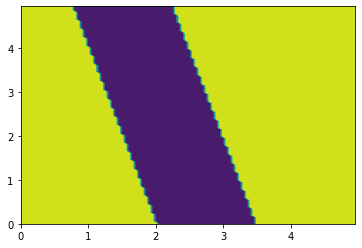

In [12]:
# Start and end points for change of r
r3d = 0.3*np.ones([wave_n*Ni,wave_n*Nj])
st = int( 8*Ni/l3d )
en = int( 14*Ni/l3d )

# Impliments straight line equation on region
for i in range(int(Ni*wave_n)):
    for j in range(int(Nj*wave_n)):
        if j > -4*i+st and j < -4*i+en:
            r3d[j,i] = 0.20
            
# Initialise Variables
x0 = np.arange(0, wave_n*l3d, h)
y0 = np.arange(0, wave_n*l3d, h)

x3d,y3d = np.meshgrid(x0, y0)
sigma = 1
midy  = wave_n*l3d/2

# Plot r 
plt.contourf(x3d, y3d, r3d, cmap= 'viridis')
plt.show()

#### Hyperbola/ Concave Lens
We see the charateristic divergence of wave when passing through

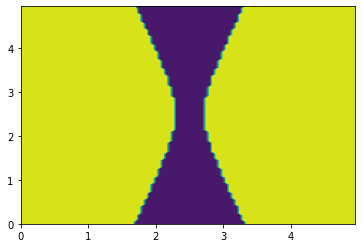

In [13]:
# Sets up r
r3d = 0.3*np.ones([wave_n*Ni,wave_n*Nj])

cnt = 2.5*Ni/l3d 
a = 1
b = 10

# Impliments hyperbola eq for r grid
for i in range(int(Ni*wave_n)):
    for j in range(int(Nj*wave_n)):
        if (i-cnt)**2/a - (j-cnt)**2/b < 1*Ni/l3d :
            r3d[j,i] = 0.15

#Initialise variables
x0 = np.arange(0, wave_n*l, h)
y0 = np.arange(0, wave_n*l, h)

x3d,y3d = np.meshgrid(x0, y0)
sigma = 1
midy  = wave_n*l/2

# Plot r 
plt.contourf(x3d, y3d, r3d, cmap= 'viridis')
plt.show()

#### Elipse/ Convexed Lens
We see the charateristic focusing of wave when passing through

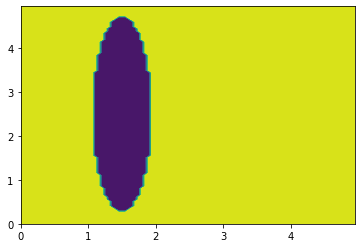

In [14]:
# Set up r
r3d = 0.3*np.ones([wave_n*Ni,wave_n*Nj])

cntx = 1.5*Ni/l3d 
cnty = 2.5*Ni/l3d

a = 0.2*Ni/l3d
b = 5*Ni/l3d

# Impliments elipse equation to r grid
for i in range(int(Ni*wave_n)):
    for j in range(int(Nj*wave_n)):
        if (i-cntx)**2/a + (j-cnty)**2/b < 1*Ni/l3d :
            r3d[j,i] = 0.12

x0 = np.arange(0, wave_n*l, h)
y0 = np.arange(0, wave_n*l, h)

x3d,y3d = np.meshgrid(x0, y0)
sigma = 20
midy  = wave_n*l3d/2

plt.contourf(x3d, y3d, r3d, cmap= 'viridis')
plt.show()

#### Analogous semi-silvered concaved mirror:
Focuses wave back on itself and wave that passes through diverges

In [ ]:
# Start and end points for change of r
r3d = 0.3*np.ones([wave_n*Ni,wave_n*Nj])

cnt = 2.5*Ni/l3d

a = 1
b = 10

for i in range(int(Ni*wave_n)):
    for j in range(int(Nj*wave_n)):
        if (i-cnt)**2/a - (j-cnt)**2/b < 1*Ni/l3d and i < cnt :
            r3d[j,i] = 0.1

x0 = np.arange(0, wave_n*l3d, h)
y0 = np.arange(0, wave_n*l3d, h)

x3d,y3d = np.meshgrid(x0, y0)
sigma = 1
midy  = wave_n*l/2

plt.contourf(x3d, y3d, r3d, cmap= 'viridis')
plt.show()

### Code to iterate and plot selected r
pick and run a specific r above then run cells/ animation below

In [16]:
# Setup theta and restrict initial wave to one wavelength
t3d = 0
theta0 = np.sin( k3d*x3d - w3d*t3d)*np.exp(-(y3d-midy)**2/sigma)

theta0[:,0]=0
theta0[:,int(1/h):]=0

theta0[0,:]=0
theta0[-1,:]=0

t3d += dt3d
theta1 = np.sin( k3d*x3d - w3d*t3d)*np.exp(-(y3d-midy)**2/sigma)

theta1[:,0]=0
theta1[:,int(1/h):]=0

theta1[0,:]=0
theta1[-1,:]=0

# Run for at 300 steps
Nn = 300
store_theta3d = [theta0, theta1]

# Iterates waave and stores in time
for n in range(2,Nn):
    # Update theta array
    thetan = wave_2D(theta1, theta0, r3d)
    theta0 = np.copy(theta1)
    theta1 = np.copy(thetan)
    
    # Sets boundary conditions
    theta1[0,:]=0
    theta1[-1,:]=0
    
    theta1[:,0]=0
    theta1[:,-1]=0
    
    t3d += dt3d
   
    store_theta3d.append(theta1)

store_theta3d= np.array(store_theta3d)

#### Animated plots:

In [ ]:
# Animated contour plot (no cbar to save on computer power)
for i in range(Nn):
    clear_output(wait=True)
    
    # Plots Contour
    fig_3d, ax3d = plt.subplots(1)
    ax3d.contourf(x3d, y3d, store_theta3d[i], cmap= 'viridis')
    ax3d.set_title('Animated wave plot')

    plt.draw()
    plt.pause(0.0001)
    print(i)

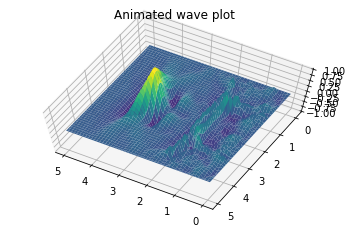

295


In [17]:
# Animated 3D plot(no cbar to save on computer power)
for i in range(Nn):
    if i%5 == 0:

        clear_output(wait=True)
        
        # Plots surface
        fig_3d = plt.figure()
        ax3d = fig_3d.add_subplot(111,projection='3d')
        ax3d.plot_surface(x3d, y3d, store_theta3d[i], cmap= 'viridis')
        
        # Sets limit and veiw
        ax3d.view_init(70, 120)
        ax3d.set_title('Animated wave plot')
        ax3d.set_zlim((-1,1))

        plt.draw()
        plt.pause(0.0001)
        print(i)